# **MDI 341 - Data Challenge**
---
***Thomas KOCH***


## **About my work**

#### ***Version Française***

Le travail réalisé sur ce challenge m'a permis de tester de nombreux algorithmes dont la majorité figurent dans ce notebook. Ce qui ressort des résultats obtenus et des investigations menées est que le **One Class Support Vector Machine** a été l’algorithme le plus performant pour détecter les anomalies dans ce cas de figure. Les meilleurs résultats ont systématiquement été obtenus en **concaténant 3 scores** d'OSVM avec en entrée les données retravaillée de la sorte :

1. **Statistiques** sur les séries brutes en séparant ces statistiques en **deux échantillons d’entraînements**.
2. **PCA à 10 composantes** sur les données brutes.

En entraînant un OSVM sur ces trois datasets, puis en combinant leurs scores, j'ai pu obtenir de bons résultats.

Le meilleur score a été obtenu en concaténant deux meilleurs scores, eux-mêmes obtenus en concaténant des résultats d'OSVM entraînés sur des datasets différents selon la méthodologie décrite ci-dessus.


Pour le **features enginnering**, le principe retenur a été de recréer chaque série une par une en utilisant une **fenêtre d'expansion** (méthode `.expanding()` de `pandas`) sur l'ensemble de données initial, et en se basant sur :
1. la moyenne `.mean()`
2. la médiane `.median()`

J'ai ensuite calculé quelques statistiques sur ces séries re-engineerer, séparé ces statistiques en deux groupes de features, entraîné un OSVM sur chaque groupe puis effectué une PCA à 10 composantes sur les séries obtenues avec la méthode `expanding()`.

Enfin, il a fallu **concaténer les différents scores obtenus** avec chaque OSVM. Pour ce faire, j'ai tout simplement normaliser entre 0 et 1 chaque score, les ai additionné entre eux puis éffectué une nouvelle normalisation entre 0 et 1 de la somme. 


Pour résumer, j'ai obtenu mon meilleur score en suivant les étapes ci-dessous :

| Id | Détails sur la méthode ou les données d'entrées | Algos et Paramètres utilisés | Score obtenu |
|----|------------------------|---------------------|--------------|
| 1 | Stats 1 sur `.expanding().mean()` | OSVM(nu=0.01, gamma=0.07) | 0.7799 | 
| 2 | Stats 2 sur `.expanding().mean()` | OSVM(nu=0.01, gamma=0.07) | 0.7250 | 
| 3 | PCA sur `.expanding().mean()` | PCA(n_components=10, random_stats=42), OSVM(nu=0.01, gamma=0.01)  | 0.7074 | 
| **4** | **Concaténation scores 1, 2, 3** | **Addition scores normalisés puis normalisation de la concaténation** | **0.8227** |
| 5 | Stats 1 sur `.expanding().median()` | OSVM(nu=0.01, gamma=0.07) | 0.7718 |
| 6 | Stats 2 sur `.expanding().median()` | OSVM(nu=0.01, gamma=0.07) | 0.7422 | 
| 7 | PCA sur `.expanding().median()` | PCA(n_components=10, random_stats=42), OSVM(nu=0.01, gamma=0.01)  | 0.6526 |
| **8** | **Concaténation scores 5, 6, 7** | **Addition scores normalisés puis normalisation de la concaténation** | **0.8167** |
| **9** | **Concaténation des scores 4 et 8** | **Addition scores normalisés puis normalisation de la concaténation** | **0.8244** | 


#### ***English version***

The work done on this challenge allowed me to test many algorithms, the majority of which appear in this notebook. What emerges from the results obtained and the investigations carried out is that the **One-Class Support Vector Machine** was the most efficient algorithm to detect anomalies in this case. The best results were systematically obtained by **concatenating 3 OSVM scores** with the input data reworked in this way :

1. **Statistics** on the raw series by separating these statistics into **two training samples**.
2. **10-component PCA** on the raw data.

By training an OSVM on these three datasets and then combining their scores, I was able to obtain good results. 


The best score was obtained by concatenating two best scores, which were obtained by concatenating results from OSVM trained on different datasets using the methodology described above.

For the **features engineering**, the retentive principle was to recreate each series one by one using an **expanding window** (method `.expanding()` of `pandas`) on the initial dataset, and based on :
1. the average `.mean()`.
2. the median `.median()`.

I then **computed some statistics on these re-engineered series**, separated these statistics into **two groups of features**, trained an **OSVM** on each group and then performed a **10-component PCA** on the series obtained with the `expanding()` method.


Finally, it was necessary to **concatenate the different scores obtained** with each OSVM. To do this, I simply normalized each score between 0 and 1, added them together and then normalized the sum again between 0 and 1. 


To summarize, I got my best score by following the steps below:

| Id | Details about the method or input data | Algos and Parameters used | Score obtained |
|----|------------------------|---------------------|--------------|
| 1 | Stats 1 on `.expanding().mean()` | OSVM(nu=0.01, gamma=0.07) | 0.7799 | 
| 2 | Stats 2 on `.expanding().mean()` | OSVM(nu=0.01, gamma=0.07) | 0.7250 | 
| 3 | PCA on `.expanding().mean()` | PCA(n_components=10, random_stats=42), OSVM(nu=0.01, gamma=0.01) | 0.7074 | 
| **4** | **Concatenation scores 1, 2, 3** | **Addition normalized scores then normalization of concatenation** | **0.8227** |
| 5 | Stats 1 on `.expanding().median()` | OSVM(nu=0.01, gamma=0.07) | 0.7718 |
| 6 | Stats 2 on `.expanding().median()` | OSVM(nu=0.01, gamma=0.07) | 0.7422 | 
| 7 | PCA on `.expanding().median()` | PCA(n_components=10, random_stats=42), OSVM(nu=0.01, gamma=0.01) | 0.6526 |
| **8** | **Concatenation scores 5, 6, 7** | **Addition normalized scores then normalization of concatenation** | **0.8167** |
| **9** | **Concatenation of scores 4 and 8** | **Addition of normalized scores then normalization of concatenation** | **0.8244** | 
																			


## **Introduction**


### **Challenge Large Scale Machine Learning**

#### Authors: 
##### Pavlo Mozharovskyi (pavlo.mozharovskyi@telecom-paris.fr), Stephan Clémençon, Jayant Sen Gupta


### **Functional anomaly detection**

**Anomaly detection** (or **outlier detection**) comprises the **machine learning** methods aimed at identification of observations that exhibit suspicious behaviour and are very likely to cause a problem. In the **unsupervised learning** framework, no label indicating whether a training observation is anomalous or not is available. Hence, anomalies should be identified in an automatic way by learning the *normal* behavior, that of the vast majority of the observations, and considering those differing significantly from it as *abnormal*. Logically, anomalies are rare in the data and thus fall in *low density* regions: anomaly detection thus boils down to identifying the *tail* of the distribution.

With the ubiquitous deployment of sensors monitoring nearly continuously the health of complex infrastructures, **anomaly detection** can now rely on measurements sampled at a very high frequency, providing a very rich representation of the phenomenon under surveillance. In order to exploit fully the collected information, the observations cannot be treated as multivariate data anymore and a functional analysis approach is required.

A (very) short list of **literature** regarding functional anomaly detection can include:
 - J.O. Ramsay, Silverman, B.W. (2005): Functional Data Analysis. Springer-Verlag, New-York.
 - Ferraty, F., Vieu, P. (2006): Nonparametric Functional Data Analysis: Theory and Practice. Springer Science & Business Media.
 - Chandola, V., Banerjee, A., Kumar, V. (2009): Anomaly detection: A survey. ACM Computing Surveys (CSUR) 41(3), 1-58.
 - Hubert, M., Rousseeuw, P.J., Segaert, P. (2015): Multivariate functional outlier detection. Statistical Methods & Applications 24(2), 177-202.
 - Wang, J.L., Chiou, J.M., Müller, H.G. (2016): Functional data analysis. Annual Review of Statistics and Its Application 3, 257-295.

## **The properties of the dataset**


The data set is provided by the Airbus and consistst of the measures of the accelerometer of helicopters during  1 minute at frequency 1024 Hertz, which yields time series measured at in total 60 * 1024 = 61440 equidistant time points.

### **Training data**

The training set consists of one file, **airbus_train.csv**.

File **airbus_train.csv** contains one observation per row, each observation having 61440 entries, measures with equivalent time distance of 1 / 1024 seconds.

There are in total 1677 training observations.

**Training** data, input (file **airbus_train.csv**): https://partage.imt.fr/index.php/s/zqrRggLBY8GRc9i

### **Test data**

The training set consists of one file, **airbus_test.csv**, which has the same structure as file **airbus_train.csv**.

There are in total 2511 test observations.

**Training** data, output (file **airbus_test.csv**): https://partage.imt.fr/index.php/s/WpiqcjMq8ymg8zA

### **Remark**

The task of the **unsupervised anomaly detection** is difficult, in the sense that, strictly speaking, your only feedback will be your score calculated by the submission website.

## **The performance criterion**

You should submit a file that contains in each row anomaly score for the observation in the corresponding row of the file **airbus_test.csv**. For a sample submission please see the codes below. Please note, that your score should provide ordering which allows to identify anomalies, i.e. the higher the value of the score, the **more abnormal** the observation should be considered.

The performance criterion is the **Area Under the Receiver Operating Characteristic** (AUC), see also:
https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve

## **Imports**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
#from pandas.tools.plotting import parallel_coordinates
import pandas.util.testing as tm

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


In [0]:
plt.style.available
# https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## **Some definition of functions**

### **Compute dataframe with statistical characteristics**

In [0]:
def compute_stats_df (df):

    # use to compute a df with statistical characteristics
        
    # Step 1 : Transpose the original dataframe
    df_t = df.T
    
    # Step 2 : Apply the describe method on the transpose dataframe
    df_t_dscrb = df_t.describe()
    
    # Step 3 : Transpose the describe dataframe to have the same format as original dataframe
    df_stats = df_t_dscrb.T
    cols_to_drop = ['count']
    df_stats = df_stats.drop(cols_to_drop, axis=1)
    
    # Step 4 : Compute 5% quantile and 95% quantile
    df_stats['5%'] = df_t.quantile(0.05)
    df_stats['95%'] = df_t.quantile(0.95)

    df_stats = df_stats[['mean', 'std', 'min', '5%', '25%', '50%', '75%', '95%', 'max']]
    
    return df_stats

### **Score normalization**

In [0]:
def score_normalization(scores):
    
    # scores : (array) scores to normalized

    normal_array = []
    mini = min(scores)
    maxi = max(scores)

    for i in range(len(scores)) :
        normal_array.append((scores[i] - mini)/(maxi - mini))
    
    normal_array = np.array(normal_array)
    
    print('Nomalization done !')
    
    return normal_array

### **Plotting functions**

In [0]:
def scores_plot(scores, threshold, method):

    # scores : (array) array of scores obtained
    # threshold : (int) threshold to filter abnormals series
    # method : (str) name of method used

    plt.figure(figsize=(13,6))
    sns.distplot(scores, norm_hist=True, label='Scores distribution on xtest')
    #plt.vlines(threshold, ymin=0, ymax=0.8, label='Threshold')
    plt.title("Scores distribution for xtest series with {} \n".format(method))
    plt.legend()
    plt.show()

    col = np.where(scores < threshold, 'b', 'r')

    plt.figure(figsize=(18, 8))
    plt.scatter(range(2511), scores, c=col, alpha=0.6)
    plt.hlines(threshold, xmin=0, xmax=2511, label='Threshold')
    plt.title("Scatterplot of scores obtained with {} on xtest series \n \
    blue = normal ; red = abnormal \n".format(method))
    plt.xlabel('Observations (n° of series)')
    plt.legend()
    plt.show()

### **Prepare a file for submission**

In [0]:
def save_to_file(scores) :

    # Save the anomaly scores to file
    print('Score shape : {}'.format(scores.shape))
    np.savetxt('ytest_challenge_student.csv', scores, fmt = '%1.6f', delimiter=',')
    print('Save done !')

## **Load, investigate the data and features engineering**

### **Load the data**

In [0]:
path = '/content/drive/My Drive/Colab Notebooks/MDI 341 - Data Challenge/'

In [0]:
xtrain = pd.read_csv(path+'airbus_train.csv', delim_whitespace=True, header=None)
print('--- xtrain shape ---')
print(xtrain.shape)

print('')

xtest = pd.read_csv(path+'airbus_test.csv', delim_whitespace=True, header=None)
print('--- xtest shape ---')
print(xtest.shape)

--- xtrain shape ---
(1677, 61440)

--- xtest shape ---
(2511, 61440)


In [0]:
print('--- Is there NaN values in xtrain ? ---')
xtrain.isnull().values.any()

--- Is there NaN values in xtrain ? ---


False

In [0]:
print('--- Is there NaN values in xtest ? ---')
xtest.isnull().values.any()

--- Is there NaN values in xtest ? ---


False

### **Computing of statistics on series**

We want here to compute some basics statistics on differents series to extend the features we have created with PCA, or to train directly some models on that. These statistics will be compile in a dataframe :

| Series n° | mean | std | min | 25% | 50% | 75% | max |
|-----------|------|-----|-----|-----|-----|-----|-----|
| 0         | ...  | ... | ... | ... | ... | ... | ... |
| 1         | ...  | ... | ... | ... | ... | ... | ... |
| ...       | ...  | ... | ... | ... | ... | ... | ... |
| 1675      | ...  | ... | ... | ... | ... | ... | ... |
| 1676      | ...  | ... | ... | ... | ... | ... | ... |





In [0]:
xstats_train = compute_stats_df(xtrain)
xstats_test =  compute_stats_df(xtest)

#### Step 1 : Transpose the original dataframe

In [0]:
xtrain_t = xtrain.T
print('--- xtrain_t shape ---')
print(xtrain_t.shape)

xtest_t = xtest.T
print('--- xtest_t shape ---')
print(xtest_t.shape)

--- xtrain_t shape ---
(61440, 1677)
--- xtest_t shape ---
(61440, 2511)


#### Step 2 : Apply the describe method on the transpose dataframe

In [0]:
print('--- Describe xtrain_t ---\n')
xtrain_t_dscrb = xtrain_t.describe()
xtrain_t_dscrb

--- Describe xtrain_t ---



0             1     ...          1675          1676
count  61440.000000  61440.000000  ...  61440.000000  61440.000000
mean       0.039373      0.003725  ...     -0.019918      0.074032
std        0.024919      0.695547  ...      0.415039      0.013062
min       -0.247552     -1.295304  ...     -1.603581     -0.002468
25%        0.032573     -0.707911  ...     -0.316561      0.066634
50%        0.040173     -0.002714  ...     -0.028112      0.077740
75%        0.046687      0.641680  ...      0.266449      0.082676
max        0.299668      1.423423  ...      1.645138      0.130800

[8 rows x 1677 columns]

In [0]:
print('--- Describe xtest_t ---\n')
xtest_t_dscrb = xtest_t.describe()
xtest_t_dscrb

--- Describe xtest_t ---



0             1     ...          2509          2510
count  61440.000000  61440.000000  ...  61440.000000  61440.000000
mean       0.052278     -0.044933  ...     -0.003565     -0.678753
std        0.157131      0.054393  ...      0.072465      0.605475
min       -0.246444     -0.384193  ...     -0.275064     -5.092163
25%       -0.036789     -0.082956  ...     -0.052026     -1.056250
50%        0.012854     -0.043788  ...      0.002489     -0.660006
75%        0.086433     -0.005281  ...      0.049039     -0.248104
max        1.320870      0.157110  ...      0.192171      1.033367

[8 rows x 2511 columns]

#### Step 3 : Transpose the describe dataframe to have the same format as original dataframe

In [0]:
xstats_train = xtrain_t_dscrb.T
cols_to_drop = ['count']
xstats_train = xstats_train.drop(cols_to_drop, axis=1)
xstats_train

mean       std       min       25%       50%       75%       max
0     0.039373  0.024919 -0.247552  0.032573  0.040173  0.046687  0.299668
1     0.003725  0.695547 -1.295304 -0.707911 -0.002714  0.641680  1.423423
2     0.012775  0.852313 -1.745115 -0.790789  0.029049  0.794017  1.748343
3     0.004919  0.145046 -0.748198 -0.089870  0.004331  0.100698  0.717880
4     0.032258  0.656018 -1.213873 -0.605851  0.008686  0.654710  1.402794
...        ...       ...       ...       ...       ...       ...       ...
1672 -0.005592  0.235661 -1.399150 -0.125517 -0.011075  0.115673  1.364695
1673 -0.039314  0.388548 -4.530277 -0.279065 -0.028994  0.207789  3.961274
1674 -0.031425  0.484858 -2.757658 -0.375490 -0.037793  0.312096  2.552845
1675 -0.019918  0.415039 -1.603581 -0.316561 -0.028112  0.266449  1.645138
1676  0.074032  0.013062 -0.002468  0.066634  0.077740  0.082676  0.130800

[1677 rows x 7 columns]

In [0]:
xstats_test = xtest_t_dscrb.T
cols_to_drop = ['count']
xstats_test = xstats_test.drop(cols_to_drop, axis=1)
xstats_test

mean           std        min  ...        50%        75%        max
0      0.052278  1.571312e-01  -0.246444  ...   0.012854   0.086433   1.320870
1     -0.044933  5.439346e-02  -0.384193  ...  -0.043788  -0.005281   0.157110
2     -0.025039  1.439261e+00  -7.058065  ...  -0.020552   0.889994   6.521087
3     -0.019569  8.652839e-02  -0.377841  ...  -0.013400   0.052722   0.161022
4     -0.014652  5.476726e-02  -0.231434  ...  -0.015026   0.023034   0.205329
...         ...           ...        ...  ...        ...        ...        ...
2506 -19.002274  3.284294e-01 -19.527720  ... -19.044750 -18.789132 -18.198016
2507 -13.352138  1.152510e-11 -13.352138  ... -13.352138 -13.352138 -13.352138
2508   0.038360  2.244105e-01  -2.068262  ...   0.033072   0.180623   2.161117
2509  -0.003565  7.246472e-02  -0.275064  ...   0.002489   0.049039   0.192171
2510  -0.678753  6.054750e-01  -5.092163  ...  -0.660006  -0.248104   1.033367

[2511 rows x 7 columns]

#### Step 4 : Compute 5% quantile and 95% quantile

The goal here is to have a better overview of what we have on the extreme values of our series.

In [0]:
xstats_train['5%'] = xtrain_t.quantile(0.05)
xstats_train['95%'] = xtrain_t.quantile(0.95)

xstats_test['5%'] = xtest_t.quantile(0.05)
xstats_test['95%'] = xtest_t.quantile(0.95)

xstats_train = xstats_train[['mean', 'std', 'min', '5%', '25%', '50%', '75%', '95%', 'max']]
xstats_test = xstats_test[['mean', 'std', 'min', '5%', '25%', '50%', '75%', '95%', 'max']]

In [0]:
xstats_train

mean       std       min  ...       75%       95%       max
0     0.039373  0.024919 -0.247552  ...  0.046687  0.073831  0.299668
1     0.003725  0.695547 -1.295304  ...  0.641680  1.052095  1.423423
2     0.012775  0.852313 -1.745115  ...  0.794017  1.282477  1.748343
3     0.004919  0.145046 -0.748198  ...  0.100698  0.238211  0.717880
4     0.032258  0.656018 -1.213873  ...  0.654710  1.027123  1.402794
...        ...       ...       ...  ...       ...       ...       ...
1672 -0.005592  0.235661 -1.399150  ...  0.115673  0.316255  1.364695
1673 -0.039314  0.388548 -4.530277  ...  0.207789  0.571419  3.961274
1674 -0.031425  0.484858 -2.757658  ...  0.312096  0.690024  2.552845
1675 -0.019918  0.415039 -1.603581  ...  0.266449  0.677122  1.645138
1676  0.074032  0.013062 -0.002468  ...  0.082676  0.088846  0.130800

[1677 rows x 9 columns]

#### Standard Scaler
I tried to standardize the data before launching a training process but the results were not as good as I had hoped.

In [0]:
scaler = StandardScaler()
np_scaled_train = scaler.fit_transform(xtrain)
xtrain_scaled = pd.DataFrame(np_scaled_train)

In [0]:
xstats_train_scaled = compute_stats_df(xtrain_scaled)

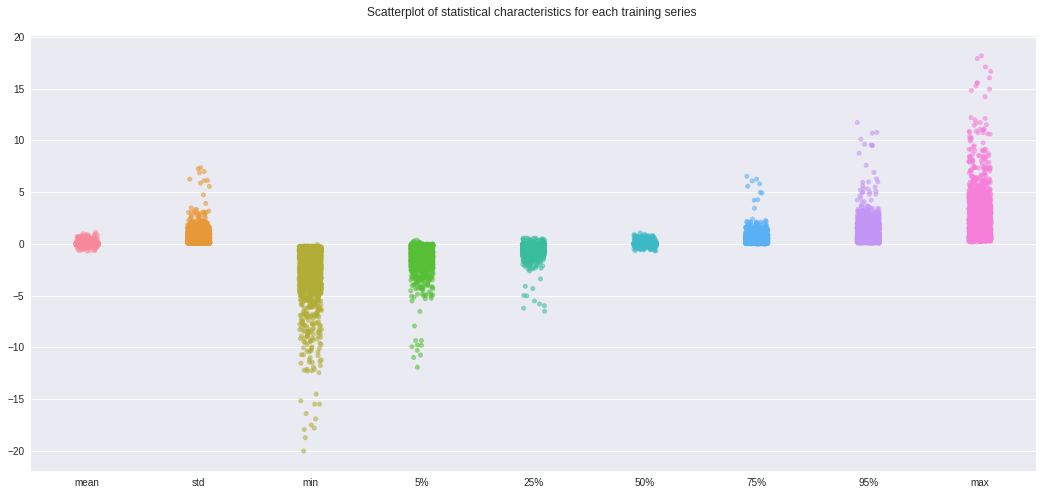

In [0]:
plt.figure(figsize=(18,8))
sns.stripplot(data=xstats_train_scaled, alpha=0.6)
plt.title("Scatterplot of statistical characteristics for each training series \n")
plt.show()

In [0]:
np_scaled_test = scaler.fit_transform(xtest)
xtest_scaled = pd.DataFrame(np_scaled_test)

In [0]:
xstats_test_scaled = compute_stats_df(xtest_scaled)

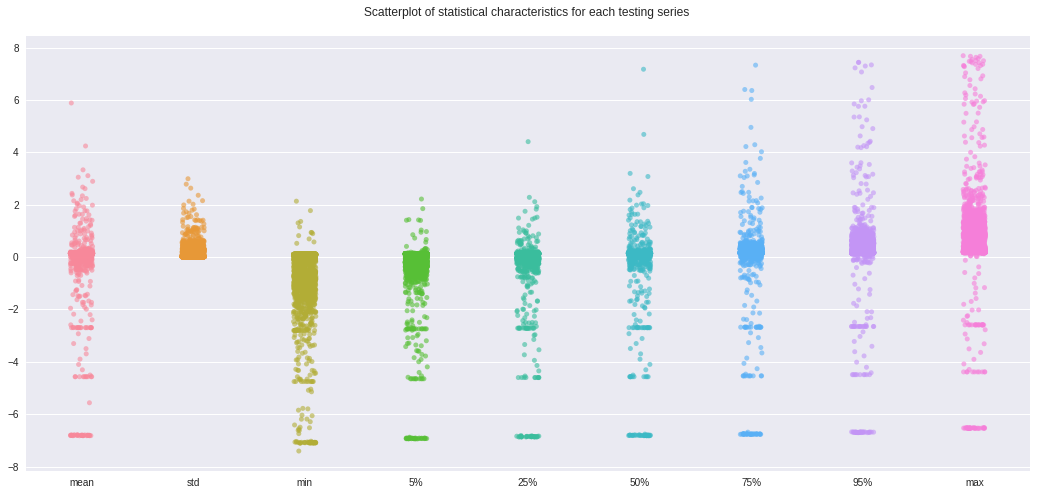

In [0]:
plt.figure(figsize=(18,8))
sns.stripplot(data=xstats_test_scaled, alpha=0.6)
plt.title("Scatterplot of statistical characteristics for each testing series \n")
plt.show()

### **Let makes some plots**



#### Plot statistical characteristics for each series

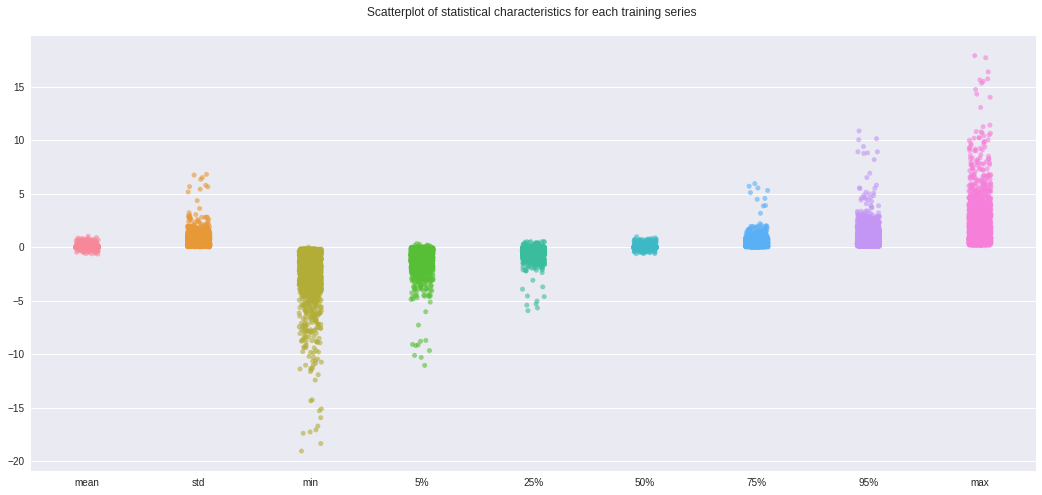

In [0]:
plt.figure(figsize=(18,8))
sns.stripplot(data=xstats_train, alpha=0.6)
plt.title("Scatterplot of statistical characteristics for each training series \n")
plt.show()

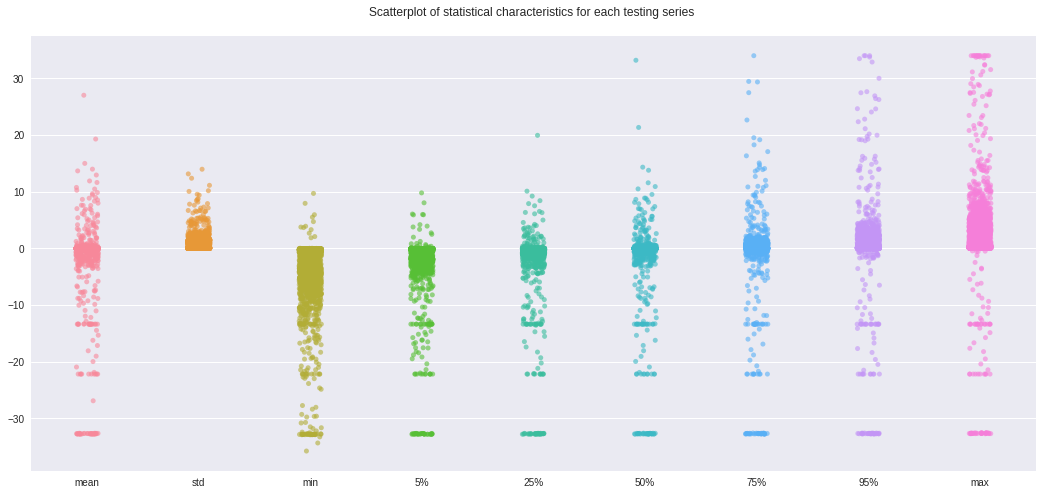

In [0]:
plt.figure(figsize=(18,8))
sns.stripplot(data=xstats_test, alpha=0.6)
plt.title("Scatterplot of statistical characteristics for each testing series \n")
plt.show()

> We can already see here that our test dataset has strange statistical charateritics compared to the train dataset. **Some of these strange series can be anomalies but other are probably not**. The point is: how can we be sure of that ? Indeed, our training dataset contains only normal series but our test dataset contains normal series, some of which are not necessarily in the training dataset. 

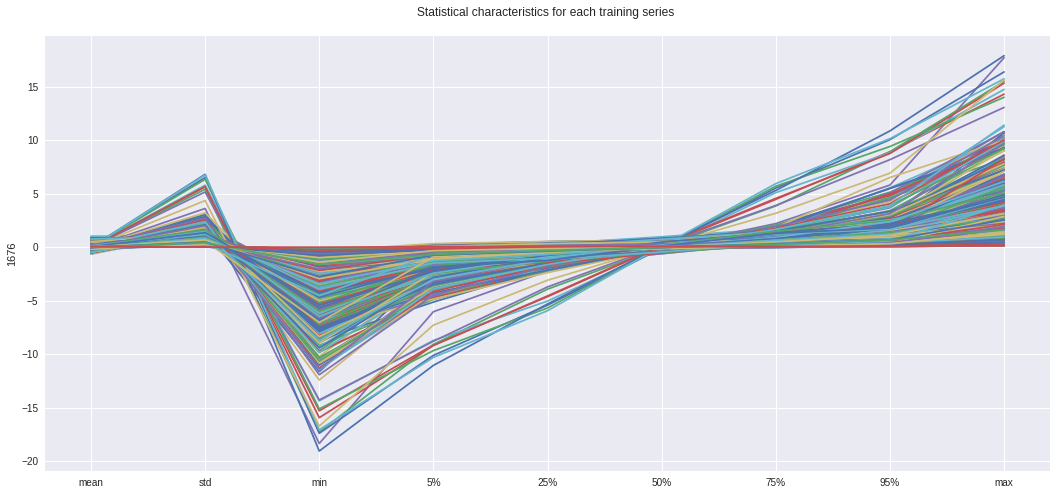

In [0]:
plt.figure(figsize=(18,8))
x_cat = ['mean', 'std', 'min', '5%', '25%', '50%', '75%', '95%', 'max']
for i in range(len(xstats_train)):
    sns.lineplot(x_cat, xstats_train.iloc[i], sort=False)
plt.title("Statistical characteristics for each training series \n")
plt.show()

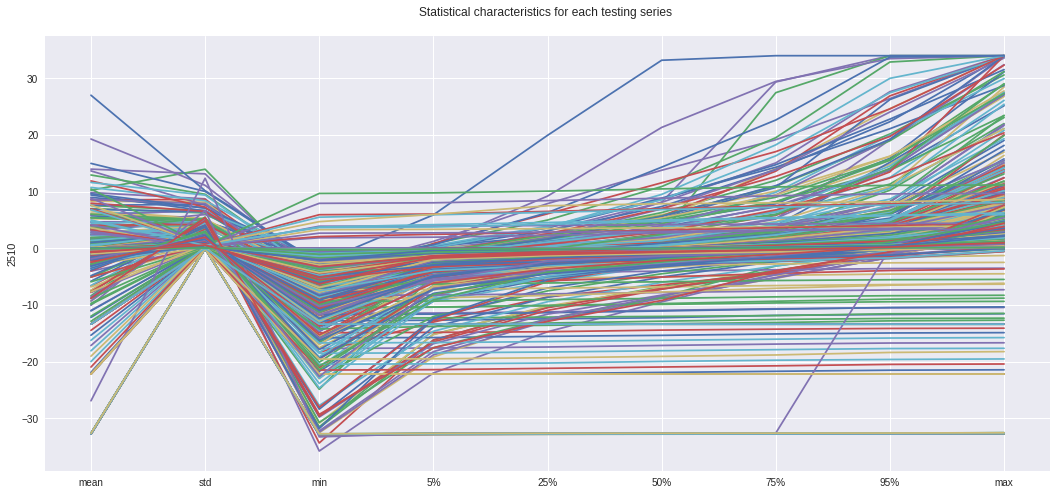

In [0]:
plt.figure(figsize=(18,8))
x_cat = ['mean', 'std', 'min', '5%', '25%', '50%', '75%', '95%', 'max']
for i in range(len(xstats_test)):
    sns.lineplot(x_cat, xstats_test.iloc[i], sort=False)
plt.title("Statistical characteristics for each testing series \n")
plt.show()

> We can do here the same constatation as before but with a different point of view. For example, it is easier to see here that if a serie has a constant value for each statistical characteristics, that probably means the series is abnormal.

#### Correlation matrix for statistical characteristics

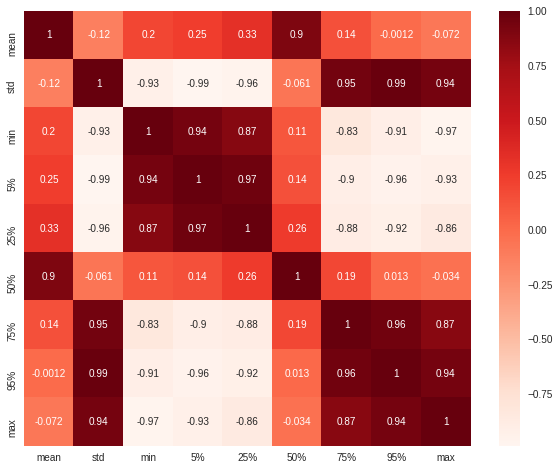

In [0]:
corr_train = xstats_train.corr()

plt.figure(figsize=(10,8))
ax = sns.heatmap(corr_train, annot=True, cmap='Reds')

> We can conclude here that the statistics we have computed are very correlated to some others. So we will be careful with that and don't put every variable in the entry of our algorithms. For example, we will just take `mean`, `std`, `min`, `50%` and `max`.

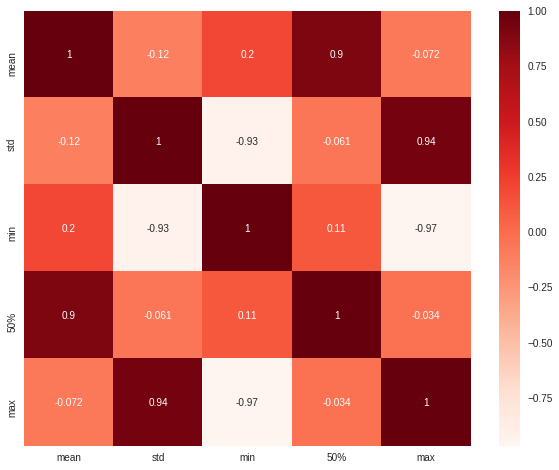

In [0]:
corr_train2 = xstats_train[['mean', 'std', 'min', '50%', 'max']].corr()

plt.figure(figsize=(10,8))
ax = sns.heatmap(corr_train2, annot=True, cmap='Reds')

> Here we conclude that we may go further by training our algorithms on differents couples and then aggregate the results we obtain. For example, we can take the following couples :

|   A   |  B   |
|-------|------|
|  mean | max  |
|  std  | 50%  |
|  max  | 50%  |
| mean  | std  |

> We drop here the min value because it is highly correlated to the max value and we don't want to overlearn on that. With the couples above, we note that every variable is represent only two times.

> An other options that we will test is to do a PCA on the dataframe with all statistical characteristics. **This test was finally not conclusive.**


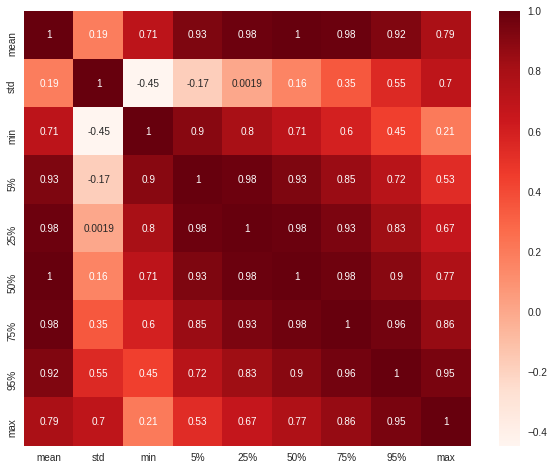

In [0]:
corr_test = xstats_test.corr()

plt.figure(figsize=(10,8))
ax = sns.heatmap(corr_test, annot=True, cmap='Reds')

#### The series themselves

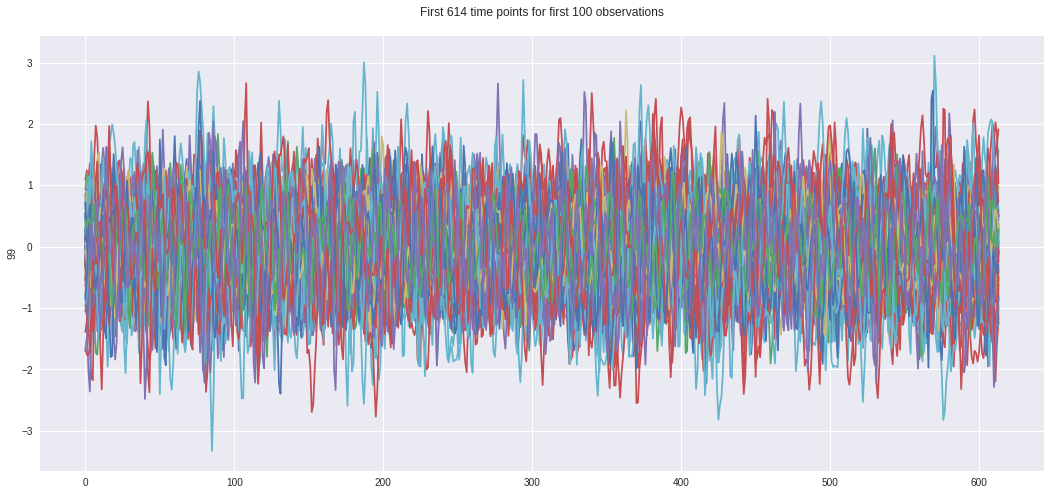

In [0]:
plt.figure(figsize=(18,8))
for i in range(100):
    sns.lineplot(range(614), xtrain.iloc[i, :614])
plt.title("First 614 time points for first 100 observations\n")
plt.show()

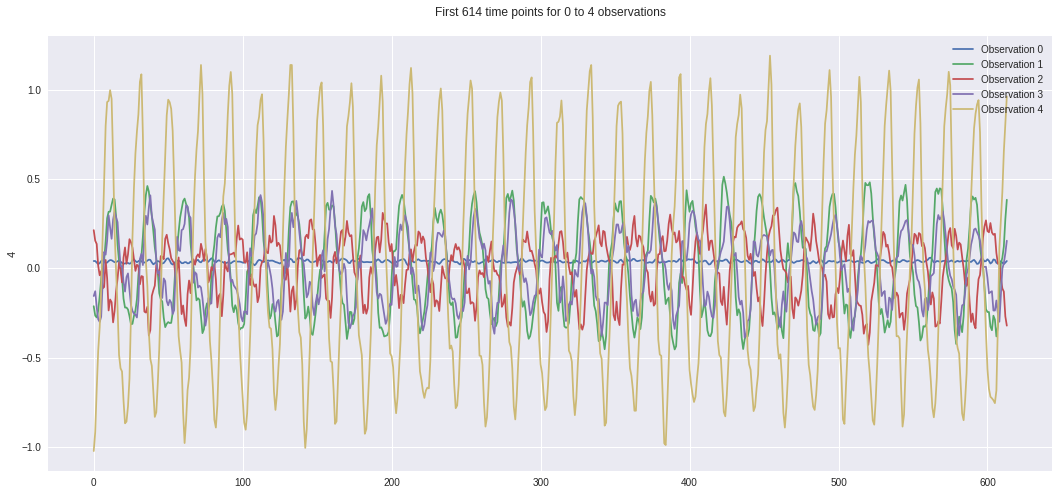

In [0]:
plt.figure(figsize=(18,8))
for i in range(5):
    sns.lineplot(range(614), xtrain.iloc[i, :614], label='Observation '+str(i))
plt.title("First 614 time points for 0 to 4 observations\n")
plt.show()

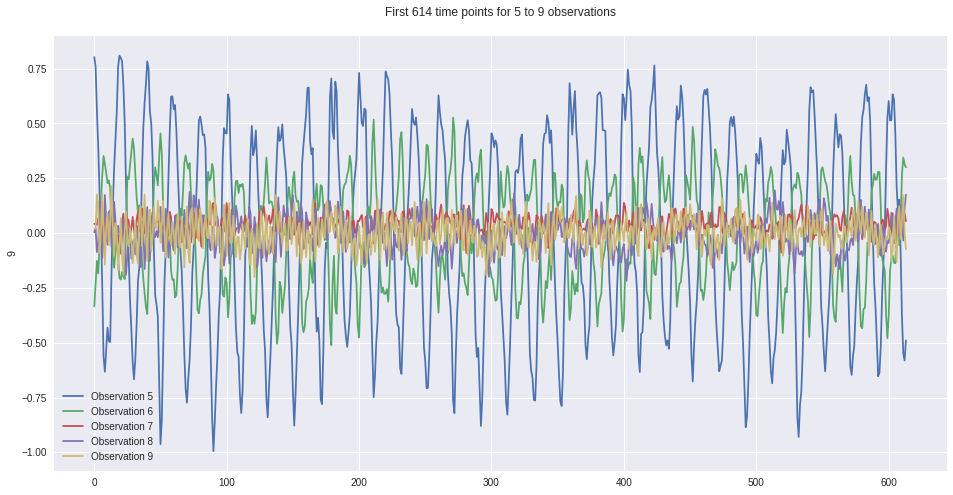

In [0]:
plt.figure(figsize=(16,8))
for i in range(5,10):
    sns.lineplot(range(614), xtrain.iloc[i, :614], label='Observation '+str(i))
plt.title("First 614 time points for 5 to 9 observations\n")
plt.show()

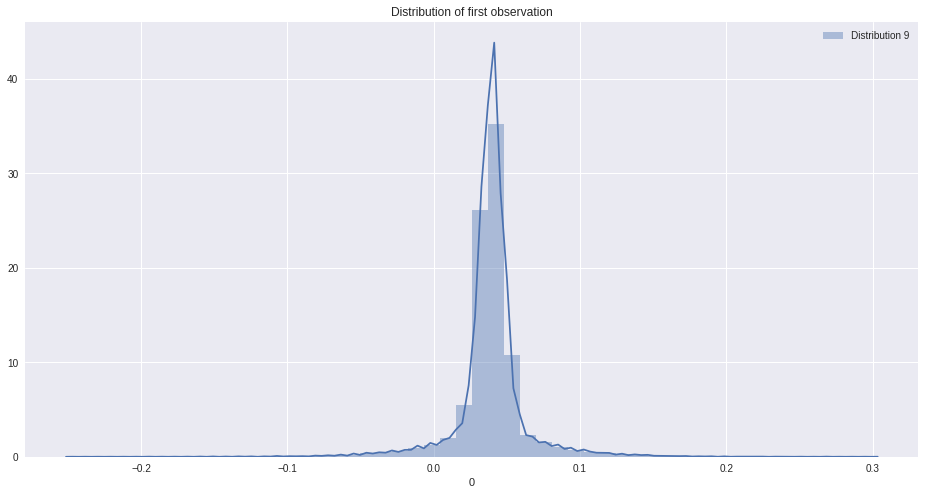

In [0]:
plt.figure(figsize=(16,8))
sns.distplot(xtrain.iloc[0, :], norm_hist=True, label='Distribution '+str(i))
plt.title("Distribution of first observation")
plt.legend()
plt.show()

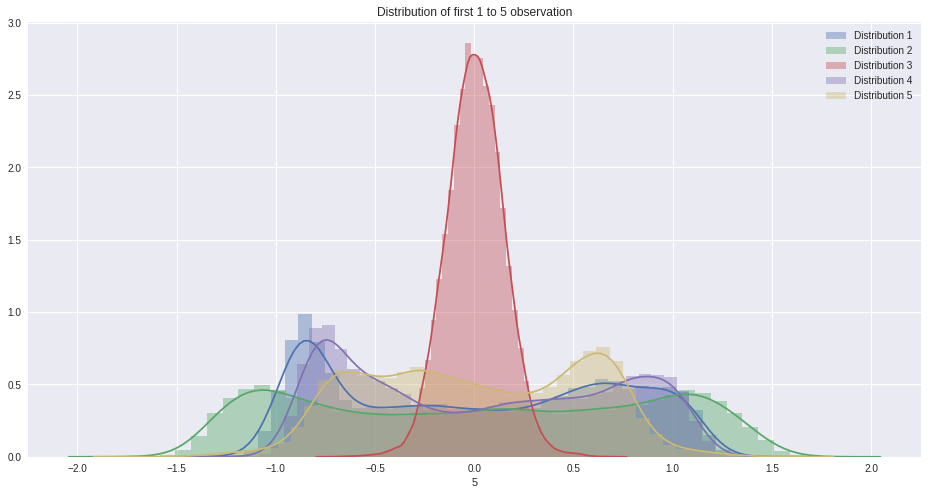

In [0]:
plt.figure(figsize=(16,8))
for i in range(1,6):
    sns.distplot(xtrain.iloc[i, :], norm_hist=True, label='Distribution '+str(i))
plt.title("Distribution of first 1 to 5 observation")
plt.legend()
plt.show()

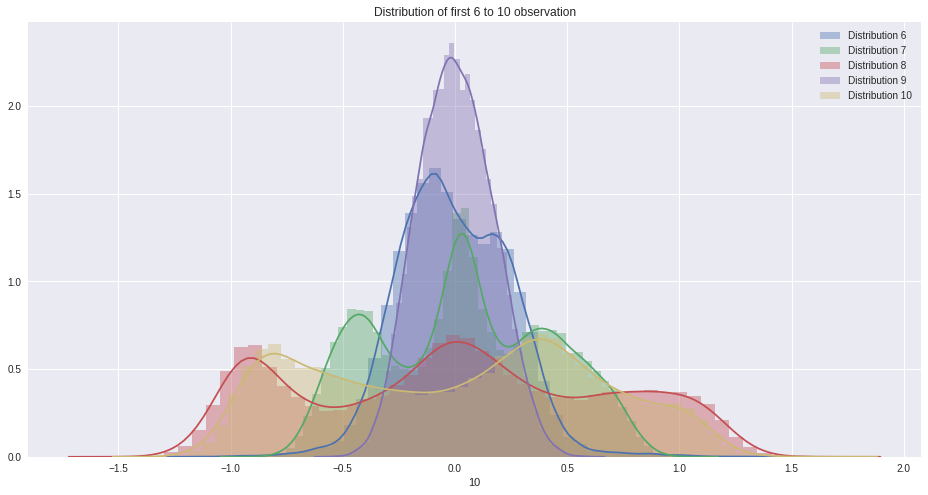

In [0]:
plt.figure(figsize=(16,8))
for i in range(6, 11):
    sns.distplot(xtrain.iloc[i, :], norm_hist=True, label='Distribution '+str(i))
plt.title("Distribution of first 6 to 10 observation")
plt.legend()
plt.show()

> We see overall a very different distribution in our first observations. We can therefore assume that this is the case throughout our dataset.

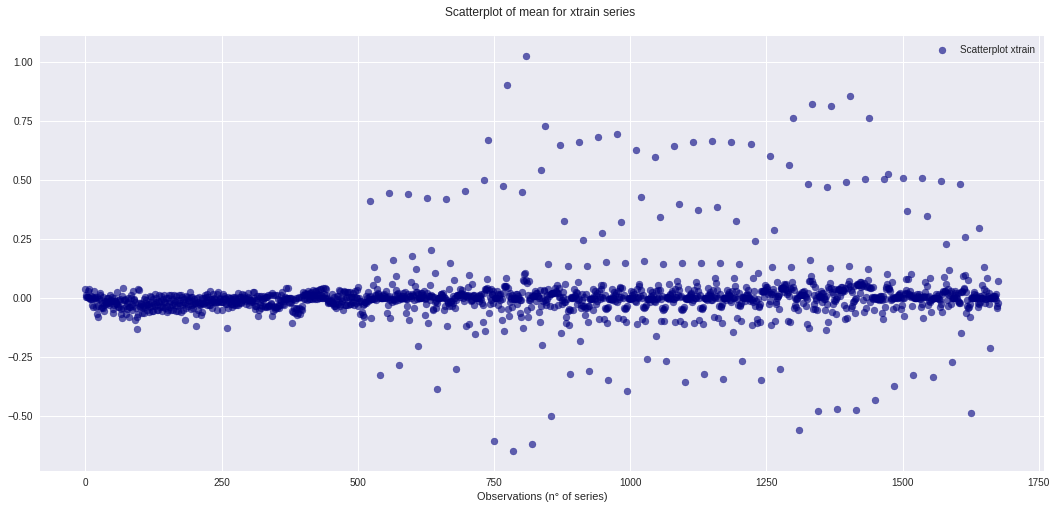

In [0]:
plt.figure(figsize=(18, 8))
plt.scatter(range(1677), xtrain_t_dscrb.iloc[1, :], alpha=0.6, color='navy', label='Scatterplot xtrain')
plt.title("Scatterplot of mean for xtrain series \n")
plt.xlabel('Observations (n° of series)')
plt.legend()
plt.show()

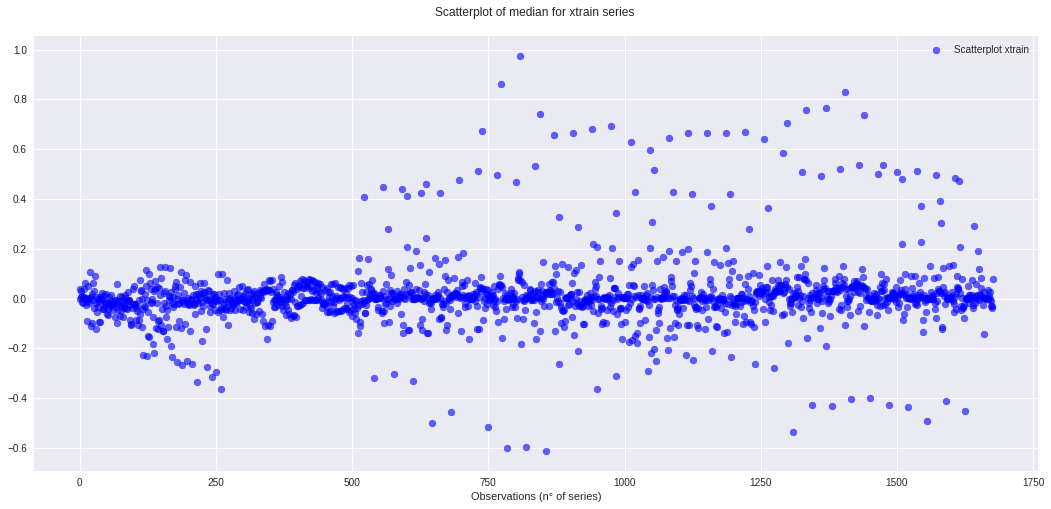

In [0]:
plt.figure(figsize=(18, 8))
plt.scatter(range(1677), xtrain_t_dscrb.iloc[5, :], alpha=0.6, color='blue', label='Scatterplot xtrain')
plt.title("Scatterplot of median for xtrain series \n")
plt.xlabel('Observations (n° of series)')
plt.legend()
plt.show()

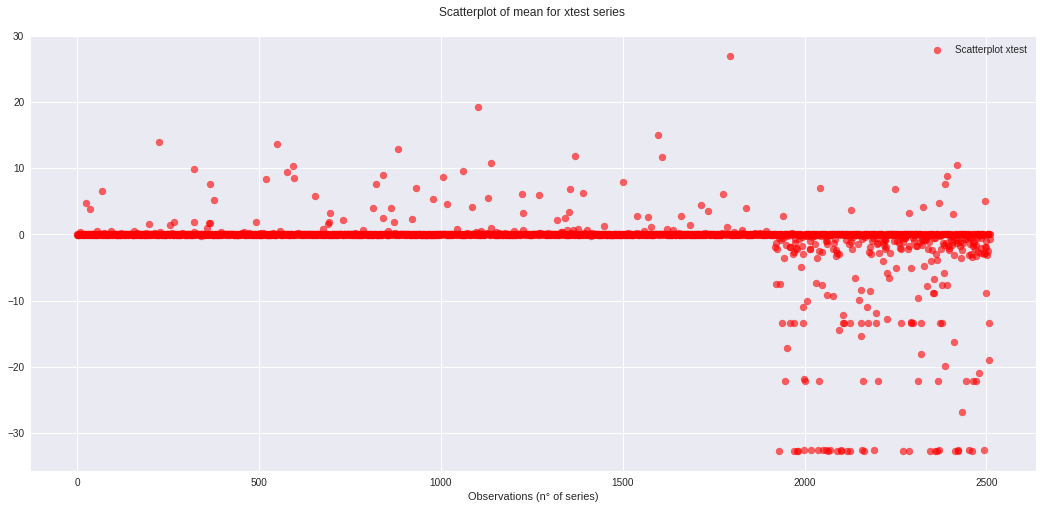

In [0]:
plt.figure(figsize=(18, 8))
plt.scatter(range(2511), xtest_t_dscrb.iloc[1, :], alpha=0.6, color='red', label='Scatterplot xtest')
plt.title("Scatterplot of mean for xtest series \n")
plt.xlabel('Observations (n° of series)')
plt.legend()
plt.show()

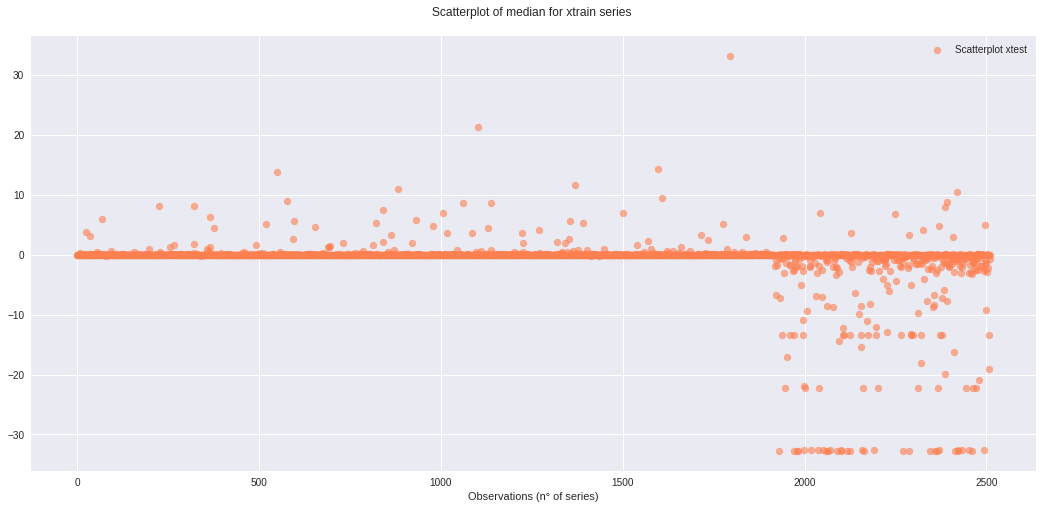

In [0]:
plt.figure(figsize=(18, 8))
plt.scatter(range(2511), xtest_t_dscrb.iloc[5, :], alpha=0.6, color='coral', label='Scatterplot xtest')
plt.title("Scatterplot of median for xtrain series \n")
plt.xlabel('Observations (n° of series)')
plt.legend()
plt.show()

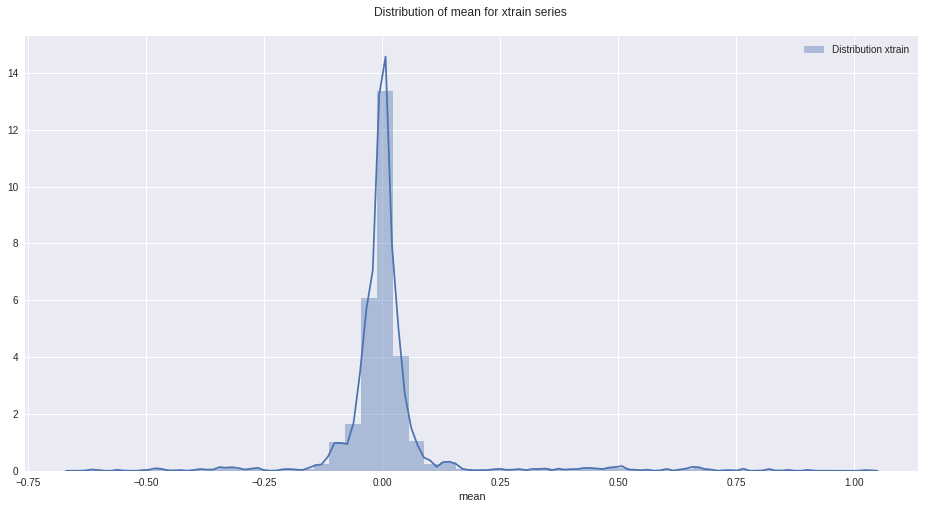

In [0]:
plt.figure(figsize=(16,8))
sns.distplot(xtrain_t_dscrb.iloc[1, :], norm_hist=True, label='Distribution xtrain')
plt.title("Distribution of mean for xtrain series \n")
plt.legend()
plt.show()

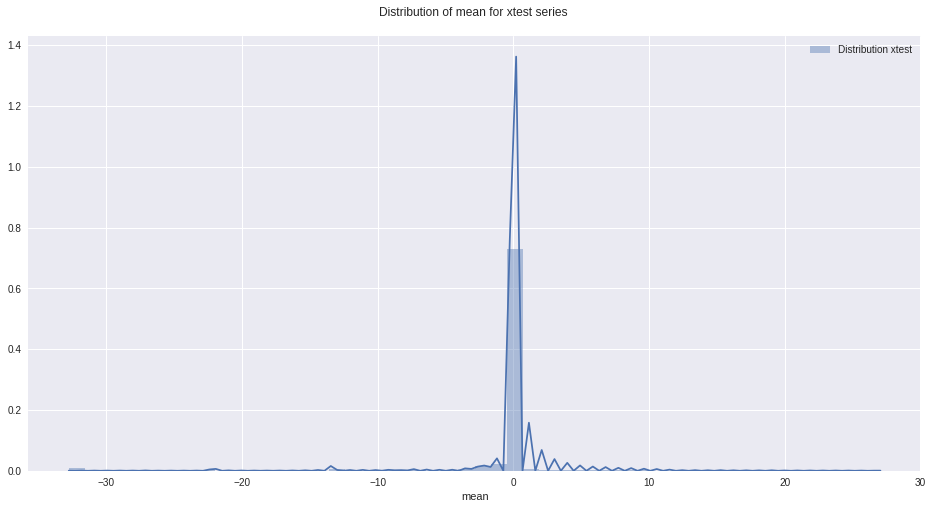

In [0]:
plt.figure(figsize=(16,8))
sns.distplot(xtest_t_dscrb.iloc[1, :], norm_hist=True, label='Distribution xtest')
plt.title("Distribution of mean for xtest series \n")
plt.legend()
plt.show()

> We notice with theses 6 graphs that **means and std of every series are relatively different** between series and into each dataframe. We also notice that **the series in the end of the test dataset are very specific and different compare to the rest of the dataset**. Let's see what it is about std.

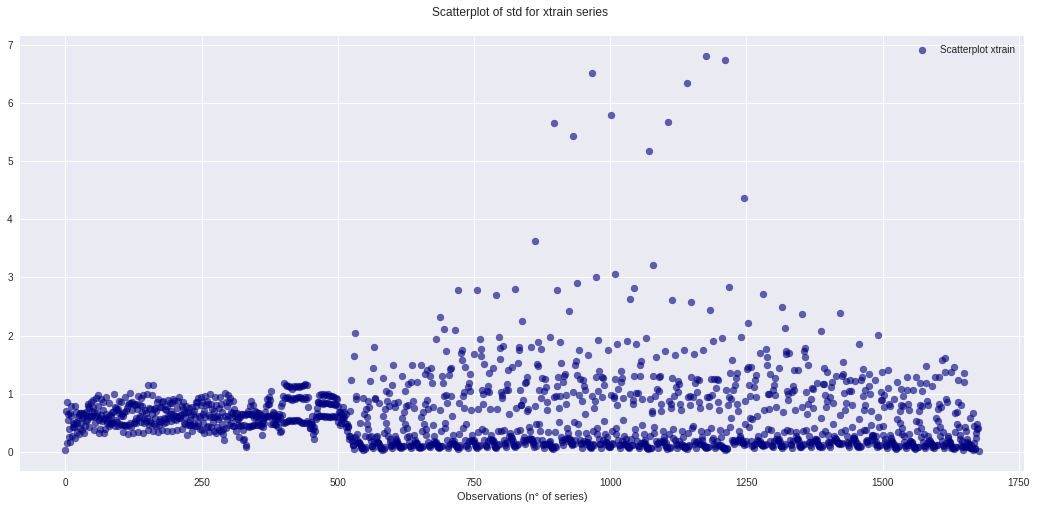

In [0]:
plt.figure(figsize=(18, 8))
plt.scatter(range(1677), xtrain_t_dscrb.iloc[2, :], alpha=0.6, color='navy', label='Scatterplot xtrain')
plt.title("Scatterplot of std for xtrain series \n")
plt.xlabel('Observations (n° of series)')
plt.legend()
plt.show()

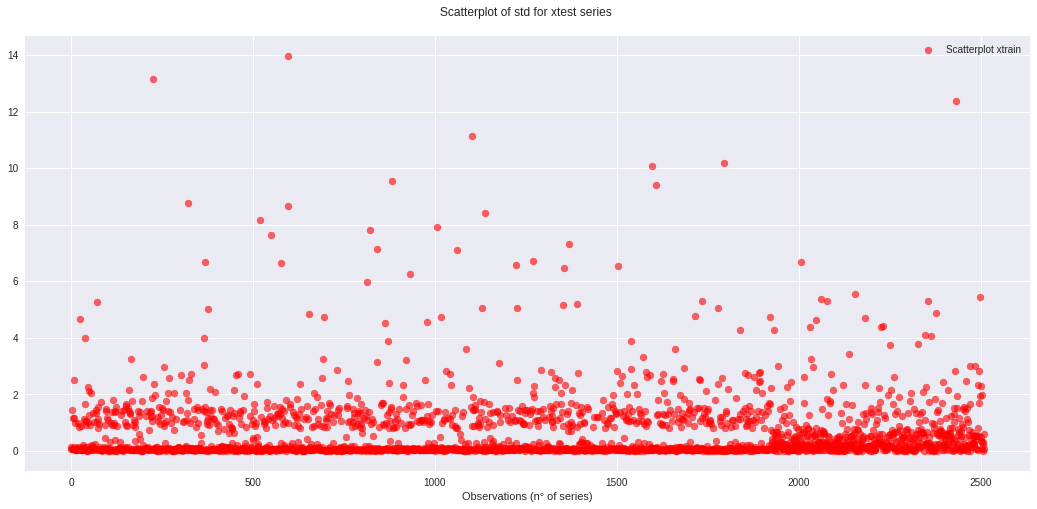

In [0]:
plt.figure(figsize=(18, 8))
plt.scatter(range(2511), xtest_t_dscrb.iloc[2, :], alpha=0.6, color='red', label='Scatterplot xtrain')
plt.title("Scatterplot of std for xtest series \n")
plt.xlabel('Observations (n° of series)')
plt.legend()
plt.show()

### **Features engeenering with expanding window**

In [0]:
dataframe_train = pd.DataFrame()

for i in range(len(xtrain)):

    window = xtrain.iloc[i].expanding()
    #dataframe_train['min serie '+str(i)] = window.min()
    #dataframe_train['std serie '+str(i)] = window.std()
    #dataframe_train['median serie '+str(i)] = window.median()
    dataframe_train['mean serie '+str(i)] = window.mean()
    #dataframe_train['max serie '+str(i)] = window.max()
    # = pd.concat([window.min(), window.mean(), window.max(), xtrain.iloc[i].shift(-1)], axis=1)
    
dataframe_train

std serie 0  std serie 1  ...  std serie 1675  std serie 1676
0              NaN          NaN  ...             NaN             NaN
1         0.000000     0.037619  ...        0.018149        0.027922
2         0.005015     0.033891  ...        0.081811        0.022798
3         0.008316     0.028514  ...        0.218448        0.021782
4         0.007600     0.047472  ...        0.448151        0.024297
...            ...          ...  ...             ...             ...
61435     0.024918     0.695537  ...        0.415051        0.013062
61436     0.024918     0.695540  ...        0.415048        0.013062
61437     0.024918     0.695542  ...        0.415045        0.013062
61438     0.024919     0.695546  ...        0.415043        0.013062
61439     0.024919     0.695547  ...        0.415039        0.013062

[61440 rows x 1677 columns]

In [0]:
xstats_train_augmented = compute_stats_df(dataframe_train.T)

In [0]:
xstats_train_augmented

mean       std       min  ...       75%       95%       max
std serie 0     0.009340  0.004978  0.000000  ...  0.007986  0.023084  0.024919
std serie 1     0.636482  0.097707  0.028514  ...  0.689487  0.694670  0.695547
std serie 2     0.747284  0.146789  0.040491  ...  0.839892  0.850078  0.852318
std serie 3     0.165376  0.027127  0.019141  ...  0.170742  0.229374  0.272594
std serie 4     0.659153  0.010898  0.075239  ...  0.664129  0.669717  0.763644
...                  ...       ...       ...  ...       ...       ...       ...
std serie 1672  0.326876  0.083533  0.046539  ...  0.387296  0.502994  0.545688
std serie 1673  0.441804  0.072104  0.188787  ...  0.468395  0.601098  0.671366
std serie 1674  0.601062  0.113150  0.224133  ...  0.685848  0.829321  0.907805
std serie 1675  0.417942  0.004942  0.018149  ...  0.418249  0.426590  0.567317
std serie 1676  0.015341  0.001973  0.013062  ...  0.017461  0.018765  0.027922

[1677 rows x 9 columns]

In [0]:
dataframe_test = pd.DataFrame()

for i in range(len(xtest)):

    window = xtest.iloc[i].expanding()
    #dataframe_test['min serie '+str(i)] = window.min()
    #dataframe_test['std serie '+str(i)] = window.std()
    #dataframe_test['median serie '+str(i)] = window.median()
    dataframe_train['mean serie '+str(i)] = window.mean()
    #dataframe_test['max serie '+str(i)] = window.max()
    # = pd.concat([window.min(), window.mean(), window.max(), xtrain.iloc[i].shift(-1)], axis=1)
    
dataframe_test

std serie 0  std serie 1  ...  std serie 2509  std serie 2510
0              NaN          NaN  ...             NaN             NaN
1         0.045446     0.020539  ...        0.000000        0.344059
2         0.079817     0.030152  ...        0.011497        0.441018
3         0.085731     0.033216  ...        0.017361        0.384035
4         0.082503     0.037470  ...        0.015153        0.394450
...            ...          ...  ...             ...             ...
61435     0.157136     0.054392  ...        0.072463        0.605485
61436     0.157135     0.054393  ...        0.072463        0.605483
61437     0.157134     0.054393  ...        0.072463        0.605484
61438     0.157133     0.054394  ...        0.072464        0.605480
61439     0.157131     0.054393  ...        0.072465        0.605475

[61440 rows x 2511 columns]

In [0]:
xstats_test_augmented = compute_stats_df(dataframe_test.T)

In [0]:
xstats_test_augmented

mean       std       min  ...       75%       95%       max
std serie 0     0.200352  0.032581  0.045446  ...  0.225674  0.260055  0.264786
std serie 1     0.051067  0.001024  0.020539  ...  0.051490  0.053110  0.063478
std serie 2     1.379443  0.200746  0.245751  ...  1.500276  1.512362  1.518361
std serie 3     0.068366  0.006980  0.008854  ...  0.068400  0.086047  0.086534
std serie 4     0.054805  0.000988  0.026435  ...  0.055176  0.055492  0.074439
...                  ...       ...       ...  ...       ...       ...       ...
std serie 2506  0.213525  0.078026  0.001738  ...  0.275888  0.317065  0.328429
std serie 2507  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
std serie 2508  0.199697  0.010827  0.087795  ...  0.201774  0.223055  0.224665
std serie 2509  0.062302  0.013263  0.000000  ...  0.073970  0.078641  0.079311
std serie 2510  0.542727  0.048674  0.344059  ...  0.593797  0.608472  0.610447

[2511 rows x 9 columns]

## **Example submission : Local Outlier Factor**

### **Possible option : Projection on a low-dimensional space and Local Outlier Factor**

In [0]:
# PCA transform
pca1 = PCA(n_components = 10, whiten = True, random_state=1010)
pca1.fit(xtrain)
xtrain_fpca = pca1.fit_transform(xtrain)
xtest_fpca = pca1.fit_transform(xtest)

In [0]:
# Fit the low-dimensional method
lof1 = LocalOutlierFactor(n_neighbors = 5 ,contamination = 'auto', 
                          novelty = True, n_jobs=-1)
lof1.fit(xtrain_fpca)

# Calculate anomaly score on the (PCA-transformed) test data
scores_LOF = -lof1.score_samples(xtest_fpca)

In [0]:
scores_LOF.shape

(2511,)

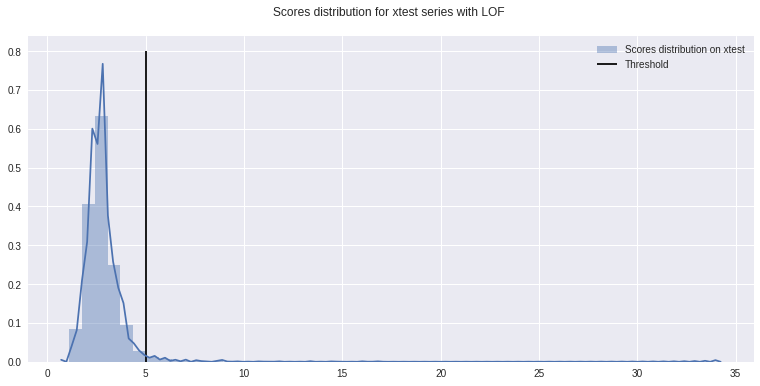

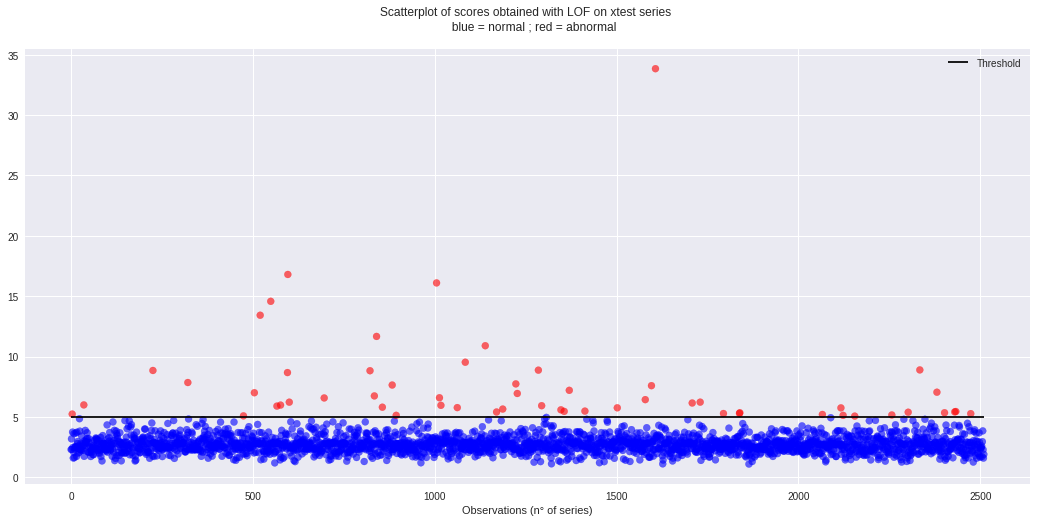

In [0]:
scores_plot(scores=scores_LOF, threshold=5, method='LOF')

### **Possible option 2 : LOF without projection**

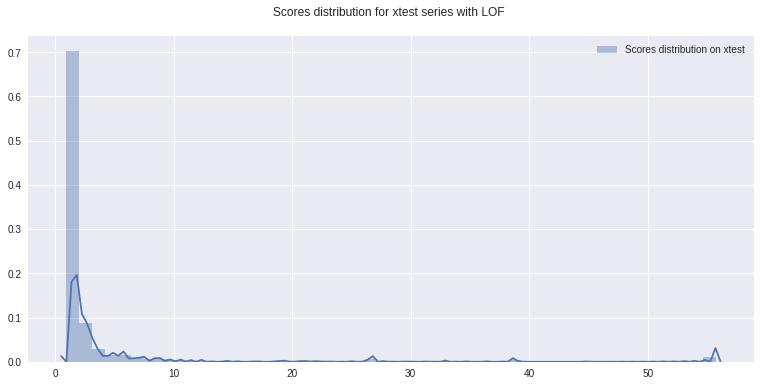

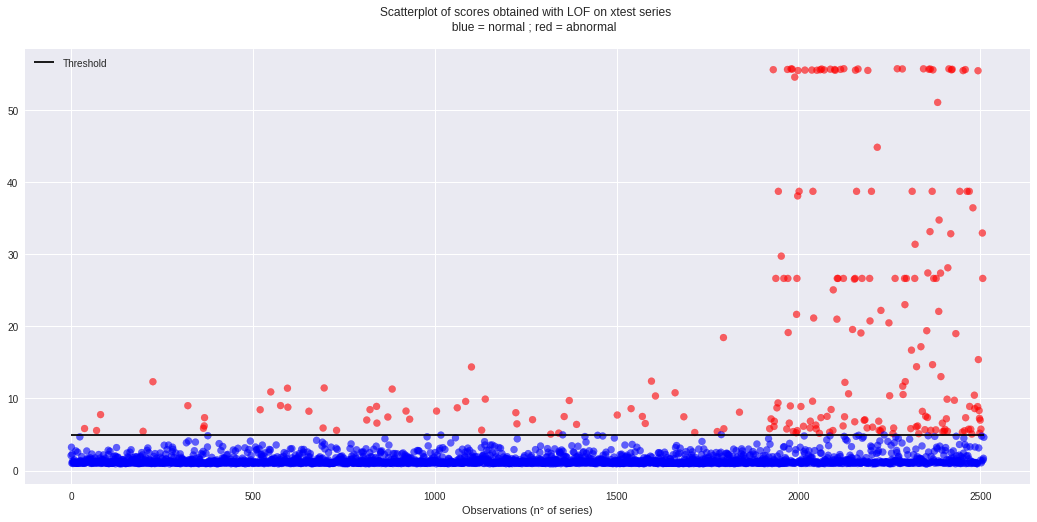

In [0]:
# Fit the low-dimensional method
lof2 = LocalOutlierFactor(n_neighbors = 5 ,contamination = 'auto', 
                          novelty = True, n_jobs=-1)
lof2.fit(xstats_train)

# Calculate anomaly score on the test data
scores_LOF2 = -lof2.score_samples(xstats_test)

# Plot the result
scores_plot(scores_LOF2, 5, 'LOF')

In [0]:
save_to_file(scores_LOF2)

Score shape : (2511,)
Save done !


In [0]:
xtrain_fpca = pd.DataFrame(xtrain_fpca)
xtest_fpca = pd.DataFrame(xtest_fpca)

xtrain3 = pd.concat([xtrain_fpca, xstats_train], axis=1)
xtest3 = pd.concat([xtest_fpca, xstats_test], axis=1)

xtrain3

0         1         2  ...       75%       95%       max
0    -0.000659 -0.036623 -0.025748  ...  0.046687  0.073831  0.299668
1    -0.002940 -0.035663 -0.022448  ...  0.641680  1.052095  1.423423
2     0.000491 -0.031922 -0.022240  ...  0.794017  1.282477  1.748343
3    -0.001478 -0.032738 -0.016776  ...  0.100698  0.238211  0.717880
4    -0.002338 -0.034200 -0.019982  ...  0.654710  1.027123  1.402794
...        ...       ...       ...  ...       ...       ...       ...
1672 -0.000408 -0.032386 -0.017869  ...  0.115673  0.316255  1.364695
1673  0.001794 -0.021346 -0.019484  ...  0.207789  0.571419  3.961274
1674  0.011761 -0.030710 -0.014266  ...  0.312096  0.690024  2.552845
1675  0.008387 -0.009092 -0.018342  ...  0.266449  0.677122  1.645138
1676 -0.000833 -0.041422 -0.030035  ...  0.082676  0.088846  0.130800

[1677 rows x 19 columns]

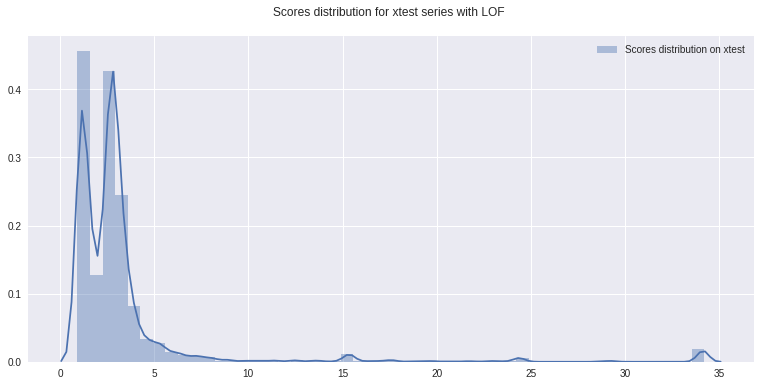

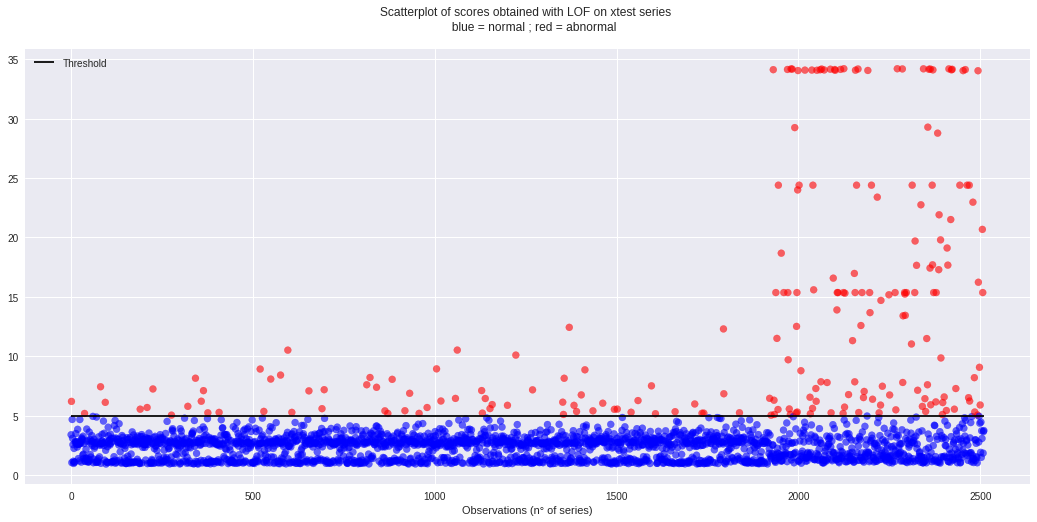

In [0]:
# Fit the low-dimensional method
lof3 = LocalOutlierFactor(n_neighbors = 5 ,contamination = 'auto', 
                          novelty = True, n_jobs=-1)
lof3.fit(xtrain3)

# Calculate anomaly score on the test data
scores_LOF3 = -lof3.score_samples(xtest3)

# Plot the result
scores_plot(scores_LOF3, 5, 'LOF')

In [0]:
save_to_file(scores_LOF3)

Score shape : (2511,)
Save done !


## **LSTM approach**

### **LSTM Autoencoder — Self-Supervised**
***Taken from [Anomaly Detection of Time Series Data](https://medium.com/@jetnew/anomaly-detection-of-time-series-data-e0cb6b382e33)***

LSTM Autoencoder is a self-supervised method that, given a time series sequence as input, predicts the same input sequence as its output. With this approach, it learns a representation of normal sequences and the prediction error can be interpreted as the anomaly score.

When doing unsupervised learning, it is always a safe step to standardize the predictors but here the results were not conclusive with this step.

In [0]:
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from keras.models import Sequential

import tensorflow as tf
tf.test.gpu_device_name()

Using TensorFlow backend.


'/device:GPU:0'

In [0]:
class LSTM_Autoencoder:
  def __init__(self, optimizer='adam', loss='mse'):
    self.optimizer = optimizer
    self.loss = loss
    self.n_features = 1
    
  def build_model(self):
    timesteps = self.timesteps
    n_features = self.n_features
    model = Sequential()
    
    # Encoder
    model.add(LSTM(timesteps, activation='relu', input_shape=(timesteps, n_features), return_sequences=True))
    model.add(LSTM(16, activation='relu', return_sequences=True))
    model.add(LSTM(1, activation='relu'))
    model.add(RepeatVector(timesteps))
    
    # Decoder
    model.add(LSTM(timesteps, activation='relu', return_sequences=True))
    model.add(LSTM(16, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(n_features)))
    
    model.compile(optimizer=self.optimizer, loss=self.loss)
    model.summary()
    self.model = model
    
  def fit(self, X, epochs=3, batch_size=32):
    self.timesteps = X.shape[1]
    self.build_model()
    
    input_X = np.expand_dims(X, axis=2)
    self.model.fit(input_X, input_X, epochs=epochs, batch_size=batch_size)
    
  def predict(self, X):
    input_X = np.expand_dims(X, axis=2)
    output_X = self.model.predict(input_X)
    reconstruction = np.squeeze(output_X)
    return np.linalg.norm(X - reconstruction, axis=-1)
  
  def plot(self, scores, timeseries, threshold=0.95):
    sorted_scores = sorted(scores)
    threshold_score = sorted_scores[round(len(scores) * threshold)]
    
    plt.title("Reconstruction Error")
    plt.plot(scores)
    plt.plot([threshold_score]*len(scores), c='r')
    plt.show()
    
    anomalous = np.where(scores > threshold_score)
    normal = np.where(scores <= threshold_score)
    
    plt.title("Anomalies")
    plt.scatter(normal, timeseries[normal][:,-1], s=3)
    plt.scatter(anomalous, timeseries[anomalous][:,-1], s=5, c='r')
    plt.show()


In [0]:
# PCA transform
pca1 = PCA(n_components = 10, whiten = True, random_state = 42)
pca1.fit(xtrain_scaled)
xtrain_fpca = pca1.fit_transform(xtrain_scaled)

# Calculate anomaly score on the (PCA-transformed) test data
xtest_fpca = pca1.fit_transform(xtest_scaled)

In [0]:
normal_timeseries = xtrain_fpca
test_timeseries = xtest_fpca

In [0]:
lstm_autoencoder = LSTM_Autoencoder(optimizer='adam', loss='mse')
lstm_autoencoder.fit(normal_timeseries, epochs=100, batch_size=32)
scores_LSTM = lstm_autoencoder.predict(test_timeseries)

#lstm_autoencoder.plot(scores_LSTM, test_timeseries, threshold=0.95)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 10)            480       
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 16)            1728      
_________________________________________________________________
lstm_3 (LSTM)                (None, 1)                 72        
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 10, 1)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 10)            480       
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 16)            1728      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 10, 1)            

In [0]:
scores_LSTM_norm = score_normalization(scores_LSTM)

Nomalization done !


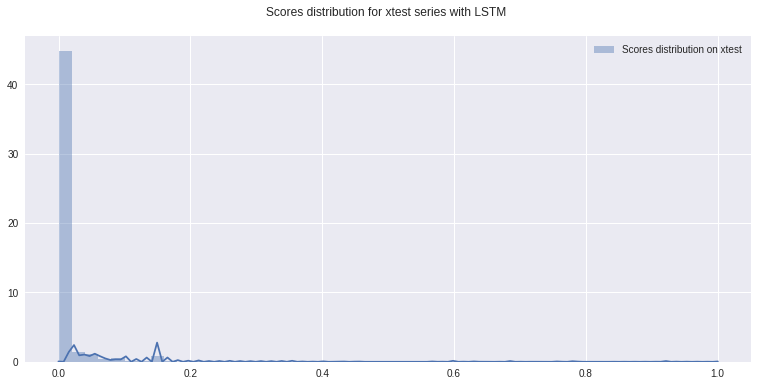

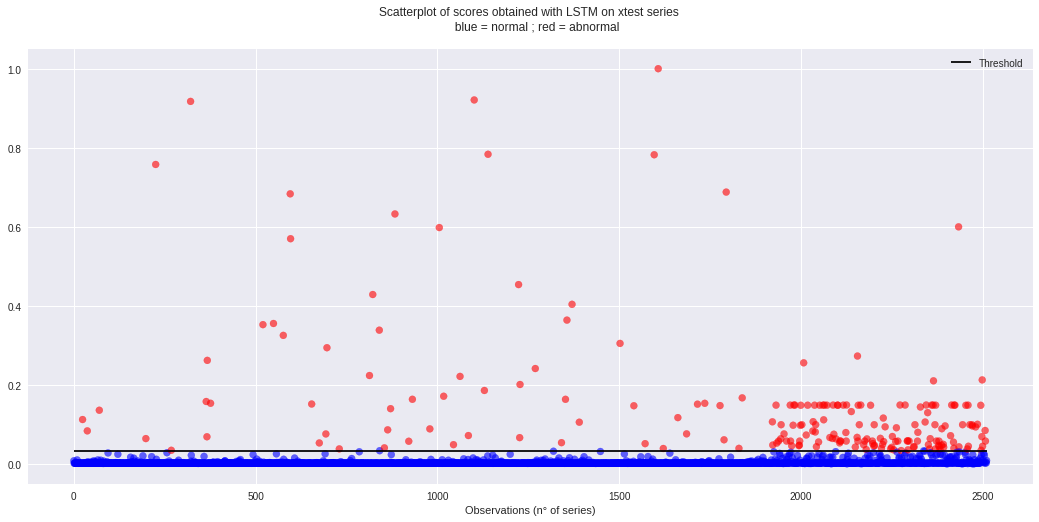

In [0]:
scores_plot(scores_LSTM_norm, 0.034, 'LSTM')

In [0]:
# Save the anomaly scores to file
save_to_file(scores_LSTM)

Score shape : (2511,)
Save done !


## **One Class SVM**
***Inspired from [Time Series of Price Anomaly Detection](https://towardsdatascience.com/time-series-of-price-anomaly-detection-13586cd5ff46)***

SVMs are max-margin methods, i.e. they do not model a probability distribution. The idea of SVM for anomaly detection is to find a function that is positive for regions with high density of points, and negative for small densities.

1. When fitting [OneClassSVM model](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM), we set `nu=outliers_fraction`, which is an upper bound on the fraction of training errors and a lower bound of the fraction of support vectors, and must be between 0 and 1. Basically this means the proportion of outliers we expect in our data.

2. Specifies the kernel type to be used in the algorithm : `rbf`. This will enable SVM to use a non-linear function to project the hyperspace to higher dimension.

3. `gamma` is a parameter of the RBF kernel type and controls the influence of individual training samples - this effects the "smoothness" of the model. 

3. `predict(data)` perform classification on data, and because our model is an one-class model, +1 or -1 is returned. **-1 is abormal**, **1 is normal**.

4. `score_samples(data)` is the raw scoring function of the samples.

***See also [sklearn documentation - Novelty and Outlier Detection](https://scikit-learn.org/stable/modules/outlier_detection.html)***

In [0]:
from sklearn.svm import OneClassSVM

In [0]:
# PCA transform (not always used)
pca1 = PCA(n_components = 10, whiten = True, random_state=42)

#xtrain3 = pd.concat([xtrain, xstats_train], axis=1)
#xtest3 = pd.concat([xtest, xstats_test], axis=1)

pca1.fit(dataframe_train.T)
xtrain_fpca = pca1.fit_transform(dataframe_train.T)
xtest_fpca = pca1.fit_transform(dataframe_test.T)

In [0]:
# Concaténation of PCA and stats dataframe
xtrain_fpca = pd.DataFrame(xtrain_fpca)
xtest_fpca = pd.DataFrame(xtest_fpca)

xtrain3 = pd.concat([xtrain_fpca, xstats_train], axis=1)
xtest3 = pd.concat([xtest_fpca, xstats_test], axis=1)

In [0]:
# train oneclassSVM 
train_data = xstats_train_augmented[['50%', 'std', '5%', '25%', '75%', '95%']] # [['mean', 'std', 'min', 'max']]  #[['50%', 'std', '5%', '25%', '75%', '95%']]
test_data = xstats_test_augmented[['50%', 'std', '5%', '25%', '75%', '95%']] #[['mean', 'std', 'min', 'max']]  #[['50%', 'std', '5%', '25%', '75%', '95%']]

model = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.07)
model.fit(train_data)

# pred_OSVM = pd.Series(model.predict(test_data))
# pred_OSVM.loc[scores_OSVM == 1] = 0
# pred_OSVM.loc[scores_OSVM == -1] = 1

scores_OSVM = -model.score_samples(test_data)
scores_OSVM = score_normalization(scores_OSVM)

Nomalization done !


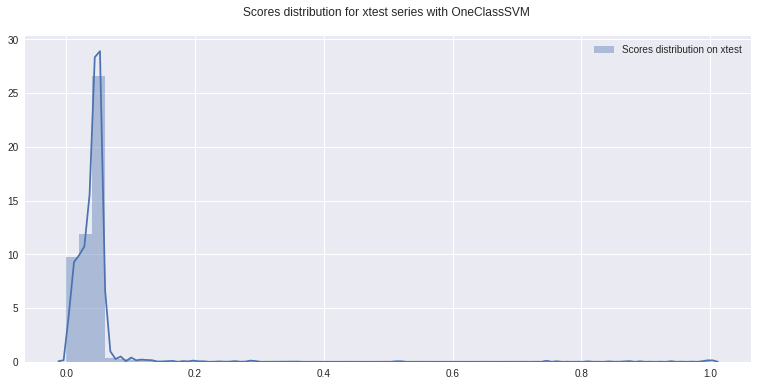

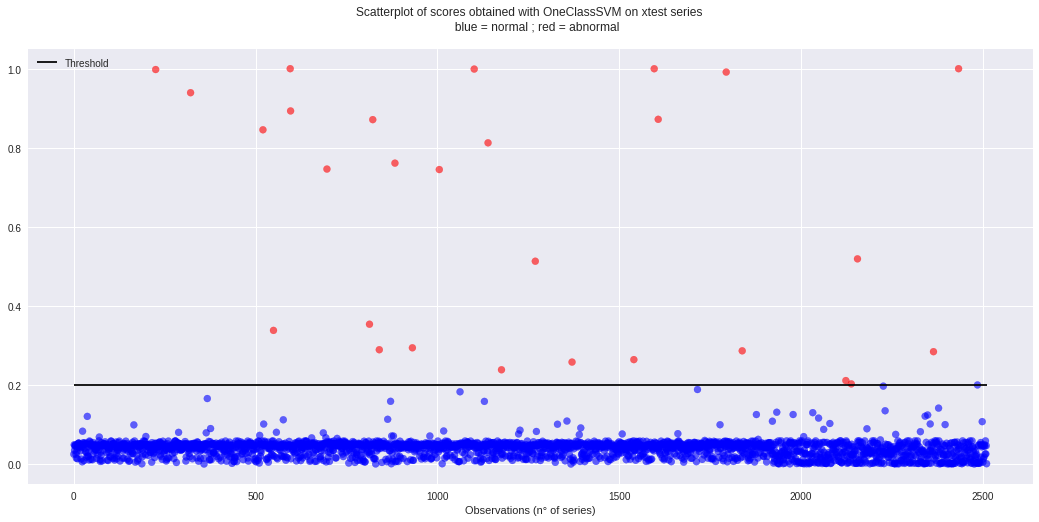

In [0]:
scores_plot(scores_OSVM, 0.2, 'OneClassSVM')

> **Note that the above curve is not representative of the best results obtained.**

In [0]:
save_to_file(scores_OSVM)

Score shape : (2511,)
Save done !


### With wavelet

> **This method was not conclusive.**

In [0]:
import pywt
pywt.families(False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

In [0]:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [0]:
wave_coef_train, wave_freqs_train = pywt.cwt(data=xtrain, scales=0.5, wavelet='gaus1')
wave_coef_test, wave_freqs_test = pywt.cwt(data=xtest, scales=0.5, wavelet='gaus1')

In [0]:
wave_coef_train = np.squeeze(wave_coef_train, axis=0)
wave_coef_test = np.squeeze(wave_coef_test, axis=0)

wave_coef_train.shape

(1677, 61440)

> The results with wavelet are not so googd, even when I combine them with other methods.

### Tuning OSVM
In order to tune the OSVM parameters, I want to use the method describe in the paper from Albert Thomas [Learning Hyperparameters for Unsupervised Anomaly Detection](https://drive.google.com/file/d/0B8Dg3PBX90KNUTg5NGNOVnFPX0hDNmJsSTcybzZMSHNPYkd3/view) but I wasn't able to use it.

GitHub repo can be found here : [https://github.com/albertcthomas/anomaly_tuning](https://github.com/albertcthomas/anomaly_tuning)

In [0]:
!pip install git+https://github.com/albertcthomas/anomaly_tuning

  Cloning https://github.com/albertcthomas/anomaly_tuning to /tmp/pip-req-build-73la_9pg
  Running command git clone -q https://github.com/albertcthomas/anomaly_tuning /tmp/pip-req-build-73la_9pg
  Created wheel for anomaly-tuning: filename=anomaly_tuning-0.1.dev0-cp36-none-any.whl size=9197 sha256=5f73bf2663a6d2724fe39e477159331a9de302812e7166f71cbc5b004e34372b
  Stored in directory: /tmp/pip-ephem-wheel-cache-g80eti40/wheels/6e/f4/96/0931dc9ce56e2a043ac48d86b4e13d9ce0f1940583b3c83fb6
Successfully built anomaly-tuning


In [0]:
from anomaly_tuning.estimators import (AverageKLPE, MaxKLPE, OCSVM,
                                       KernelSmoothing, IsolationForest)

from anomaly_tuning import anomaly_tuning

from sklearn.model_selection import ShuffleSplit

## **Isolation Forest**

[Isolation Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest) detects anomalies purely based on the fact that anomalies are data points that are few and different. The anomalies isolation is implemented without employing any distance or density measure. This method is fundamentally different from clustering based or distance based algorithms.

1. When applying an IsolationForest model, if we set `contamination = 0.01`, that is telling the model that the proportion of outliers in the data set is 0.01.

2. `fit` and `predict(data)` performs outlier detection on data, and returns 1 for normal, -1 for abnormal.

> **This algorithm brought interesting results but I quickly stagnated with it.** 


In [0]:
from sklearn.ensemble import IsolationForest

In [0]:
train_data = xstats_train
test_data = xstats_test

clf = IsolationForest(n_estimators=5000, warm_start=False, n_jobs=-1,
                      random_state=1010, contamination='auto')
clf.fit(train_data)  # fit 10 trees  

scores_IF = -clf.score_samples(test_data)

In [0]:
scores_IF_norm = score_normalization(scores_IF)

Nomalization done !


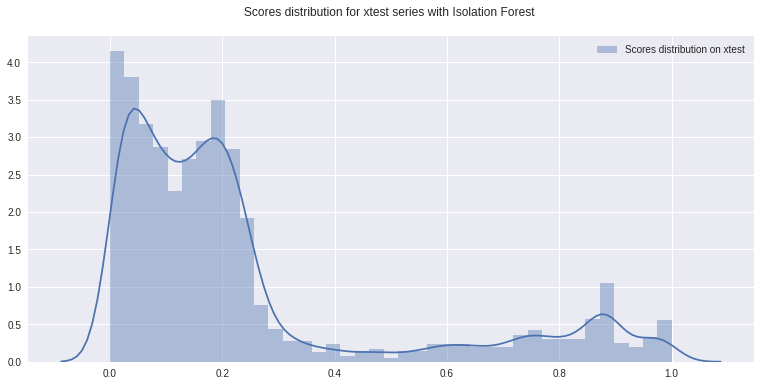

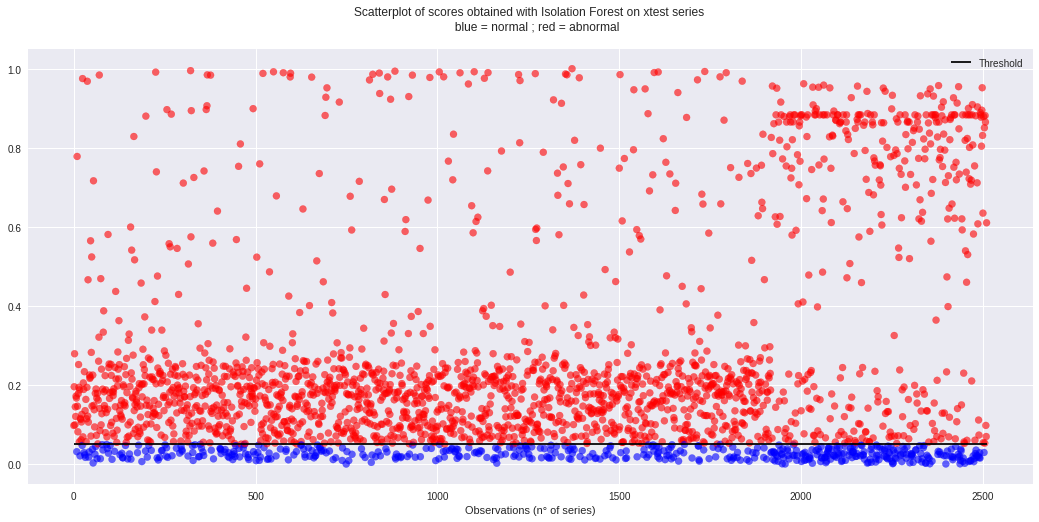

In [0]:
scores_plot(scores_IF_norm, 0.05, 'Isolation Forest')

In [0]:
save_to_file(scores_IF_norm)

Score shape : (2511,)
Save done !


## **Model concatenation with Pyodds package**

PyODDS is an end-to end Python system for outlier detection with database support. PyODDS provides outlier detection algorithms which meet the demands for users in different fields, w/wo data science or machine learning background. PyODDS gives the ability to execute machine learning algorithms in-database without moving data out of the database server or over the network. It also provides access to a wide range of outlier detection algorithms, including statistical analysis and more recent deep learning based approaches. It is developed by DATA Lab at Texas A&M University.

***Taken from :*** [https://github.com/datamllab/pyodds](https://github.com/datamllab/pyodds)


In [0]:
!pip install pyodds

In [0]:
!pip install pyod

In [0]:
from pyod.models.auto_encoder import AutoEncoder

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [0]:
# PCA transform
pca1 = PCA(n_components = 10, whiten = True, random_state = 42)
pca1.fit(xtrain)
xtrain_fpca = pca1.fit_transform(xtrain)

# Calculate anomaly score on the (PCA-transformed) test data
xtest_fpca = pca1.fit_transform(xtest)

In [0]:
clf1 = AutoEncoder(hidden_neurons =[25, 2, 2, 25])
clf1.fit(xtrain_fpca)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_13 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_14 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 25)                275       
_________________________________________________________________
dropout_15 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 2)                

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[25, 2, 2, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7f5d8adef488>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [0]:
clf2 = AutoEncoder(hidden_neurons =[25, 10,2, 10, 25])
clf2.fit(xtrain_fpca)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_19 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_20 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 25)                275       
_________________________________________________________________
dropout_21 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)               

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[25, 10, 2, 10, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7f5d8adef488>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [0]:
clf3 = AutoEncoder(hidden_neurons =[25, 15, 10, 2, 10,15, 25])
clf3.fit(xtrain_fpca)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_26 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_27 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 25)                275       
_________________________________________________________________
dropout_28 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 15)               

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[25, 15, 10, 2, 10, 15, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7f5d8adef488>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [0]:
# Predict the anomaly scores
y_test_scores = clf3.decision_function(xtest_fpca)  # outlier scores

In [0]:
scores_pyod = score_normalization(y_test_scores)

Nomalization done !


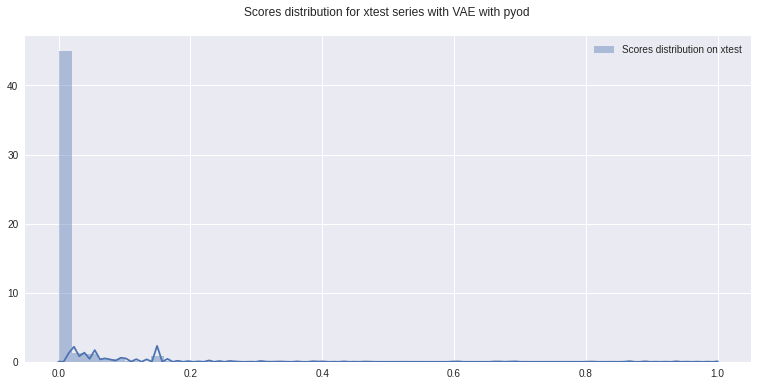

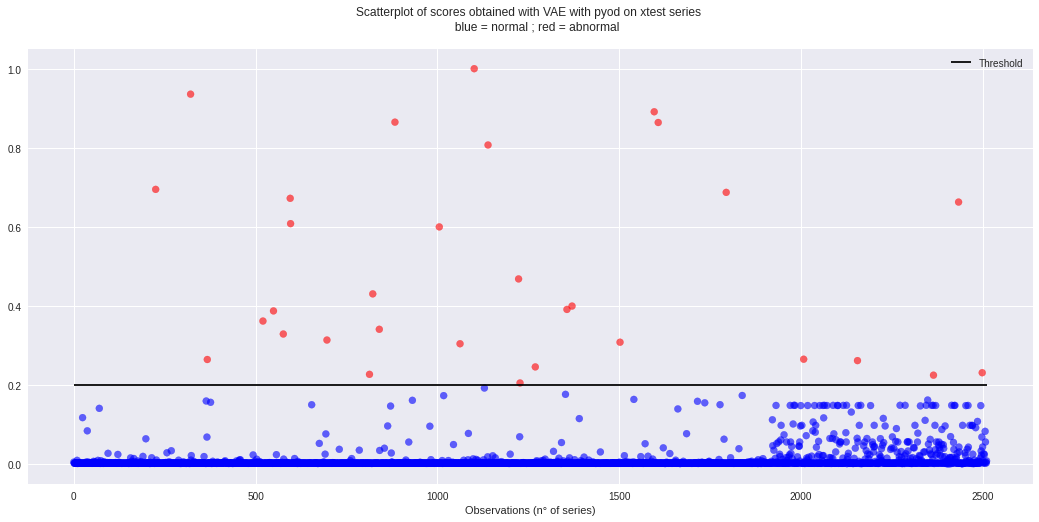

In [0]:
scores_plot(scores_pyod, 0.2, 'VAE with pyod')

In [0]:
save_to_file(scores_pyod)

Score shape : (2511,)
Save done !


In [0]:
# Put all the predictions in a data frame
from pyod.models.combination import aom, moa, average, maximization

# Put all the predictions in a data frame
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

test_scores  = pd.DataFrame({'clf1': clf1.decision_function(xtest_fpca),
                             'clf2': clf2.decision_function(xtest_fpca),
                             'clf3': clf3.decision_function(xtest_fpca) 
                            })

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## **Concatenate scores manually**

The goal here is to concatenate some scores we have obtained so we can have a better generalization of what is a normal series and what is an abnormal series.

To concatenate the scores we have obtained, we have to normalize first the different scores.

In [0]:
s1 = np.loadtxt('/content/ytest_challenge_student_soumission_80.csv')
s2 = np.loadtxt('/content/ytest_challenge_student_104.csv')
s3 = np.loadtxt('/content/ytest_challenge_student_105.csv')
s4 = np.loadtxt('/content/ytest_challenge_student_122.csv')
s5 = np.loadtxt('/content/ytest_challenge_student_135.csv')
s6 = np.loadtxt('/content/ytest_challenge_student_112.csv')

In [0]:
s1_norm = score_normalization(s1)
s2_norm = score_normalization(s2)
s3_norm = score_normalization(s3)
s4_norm = score_normalization(s4)
s5_norm = score_normalization(s5)
s6_norm = score_normalization(s6)


scores_concat = s1_norm + s2_norm + s3_norm #+ s4_norm + s5_norm + s6_norm 
scores_concat_norm = score_normalization(scores_concat)

Nomalization done !
Nomalization done !
Nomalization done !
Nomalization done !
Nomalization done !
Nomalization done !
Nomalization done !


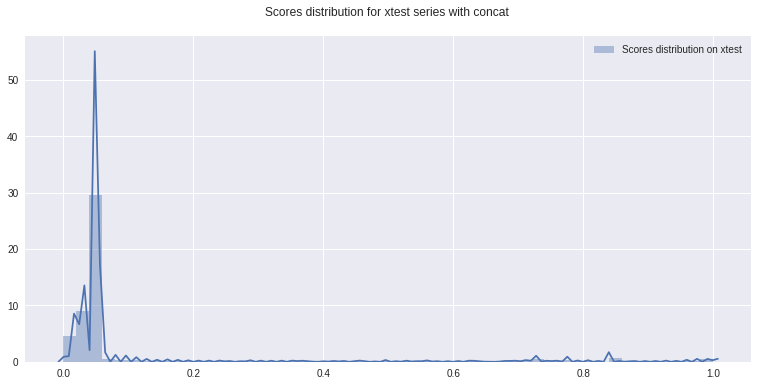

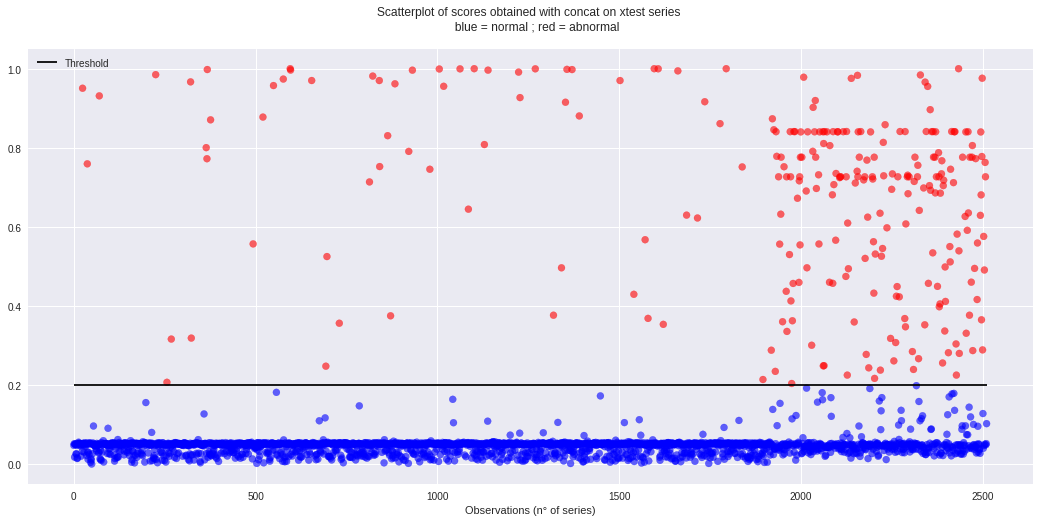

In [0]:
scores_plot(scores_concat_norm, 0.2, 'concat')

In [0]:
save_to_file(scores_concat_norm)

Score shape : (2511,)
Save done !
